# Import library

In [1]:
# Mengimpor library yang diperlukan
import pandas as pd  # Digunakan untuk manipulasi data dan analisis
import numpy as np  # Digunakan untuk operasi numerik
import requests  # Digunakan untuk mengambil data dari URL
import matplotlib.pyplot as plt  # Digunakan untuk visualisasi data
import seaborn as sns  # Digunakan untuk visualisasi data yang lebih estetis


# Unduh data

In [9]:
import zipfile
import os
import pandas as pd
import requests
from io import BytesIO

# URL untuk file ZIP
urls = [
    "http://data.gdeltproject.org/gdeltv2/20150219183000.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219183000.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.mentions.CSV.zip"
]

# Fungsi untuk mengunduh dan mengekstrak file ZIP
def download_and_extract_zip(url):
    print(f"Downloading {url}")
    # Mengunduh file ZIP dari URL
    response = requests.get(url)
    zipfile_content = BytesIO(response.content)

    # Mengekstrak file ZIP
    with zipfile.ZipFile(zipfile_content) as zip_ref:
        # Mendapatkan daftar file dalam ZIP
        file_names = zip_ref.namelist()
        # Mengambil file CSV pertama (asumsi hanya ada satu file CSV di dalam ZIP)
        csv_file = file_names[0]

        # Membaca file CSV langsung dari ZIP dengan parameter error_bad_lines=False
        with zip_ref.open(csv_file) as my_file:
            try:
                # Coba membaca CSV dengan parameter yang lebih fleksibel
                return pd.read_csv(my_file, error_bad_lines=False, warn_bad_lines=True)
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")
                return pd.DataFrame()  # Mengembalikan DataFrame kosong jika ada error

# Mengunduh dan menggabungkan data dari semua URL
all_data = pd.DataFrame()

for url in urls:
    data = download_and_extract_zip(url)
    if not data.empty:  # Pastikan data tidak kosong sebelum digabungkan
        all_data = pd.concat([all_data, data], ignore_index=True)

# Menampilkan 5 data pertama dari gabungan data
print("Data gabungan:")
print(all_data.head())

# Menyimpan data gabungan ke file CSV
all_data.to_csv('gdelt_combined_data.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_data.csv'")


Error reading 20150219183000.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219183000.gkg.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.export.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219184500.gkg.csv: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219190000.export.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Error reading 20150219190000.mentions.CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'
Data gabungan:
Empty DataFrame
Columns: []
Index: []

Data telah disimpan sebagai 'gdelt_combined_data.csv'


In [11]:
import zipfile
import os
import pandas as pd
import requests
from io import BytesIO

# URL untuk file ZIP
urls = [
    "http://data.gdeltproject.org/gdeltv2/20150219183000.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219183000.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.mentions.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219184500.gkg.csv.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.export.CSV.zip",
    "http://data.gdeltproject.org/gdeltv2/20150219190000.mentions.CSV.zip"
]

# Fungsi untuk mengunduh dan mengekstrak file ZIP
def download_and_extract_zip(url):
    print(f"Downloading {url}")
    # Mengunduh file ZIP dari URL
    response = requests.get(url)
    zipfile_content = BytesIO(response.content)

    # Mengekstrak file ZIP
    with zipfile.ZipFile(zipfile_content) as zip_ref:
        # Mendapatkan daftar file dalam ZIP
        file_names = zip_ref.namelist()
        # Mengambil file CSV pertama (asumsi hanya ada satu file CSV di dalam ZIP)
        csv_file = file_names[0]

        # Membaca file CSV langsung dari ZIP dengan parameter on_bad_lines='skip' dan sep='\t'
        with zip_ref.open(csv_file) as my_file:
            try:
                # Membaca CSV dengan tab sebagai pemisah
                return pd.read_csv(my_file, sep='\t', on_bad_lines='skip')  # Menggunakan sep='\t' untuk tab separator
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")
                return pd.DataFrame()  # Mengembalikan DataFrame kosong jika ada error

# Mengunduh dan menggabungkan data dari semua URL
all_data = pd.DataFrame()




In [12]:
for url in urls:
    data = download_and_extract_zip(url)
    if not data.empty:  # Pastikan data tidak kosong sebelum digabungkan
        all_data = pd.concat([all_data, data], ignore_index=True)

# Menampilkan 5 data pertama dari gabungan data
print("Data gabungan:")
print(all_data.head())

# Menyimpan data gabungan ke file CSV
all_data.to_csv('gdelt_combined_data.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_Data.csv'")

Data gabungan:
     410656065  20150219174500  20150219183000    1  wickedlocal.com  \
0  410656066.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
1  410656067.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
2  410656068.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
3  410656069.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
4  410656070.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   

  http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869    4   -1  \
0  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
1  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
2  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
3  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
4  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   

     956    948  ...  \
0  956.0  855.0  ...   
1  956.0  855.0  

# Preprocessing

In [14]:
# Menampilkan nama kolom
print(all_data.columns)

Index(['410656065', '20150219174500', '20150219183000', '1', 'wickedlocal.com',
       'http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869',
       '4', '-1', '956', '948',
       ...
       'http://www.harpers.co.uk/news/ej-gallo-to-psychoanalyse-tweets-of-apothic-red-drinkers/513976.article',
       '410641873', '20150219164500', 'new-magazine.co.uk',
       'http://www.new-magazine.co.uk/latestnews/view/67271/John-Galliano-files-appeal-against-unfair-dismissal-ruling/',
       '646', '632', '60', '695', '-3.17460317460318'],
      dtype='object', length=147)


In [15]:
# Menampilkan statistik deskriptif untuk beberapa kolom
print(all_data.describe())


          410656065  20150219174500  20150219183000             1  \
count  1.070700e+04    1.070700e+04    3.455000e+04  53044.000000   
mean   4.105654e+08    2.015022e+13    2.015022e+13      0.910169   
std    3.452507e+05    4.423600e+06    3.594123e+06      0.294581   
min    4.039132e+08    2.015012e+13    2.015012e+13      0.000000   
25%    4.105076e+08    2.015022e+13    2.015022e+13      1.000000   
50%    4.106469e+08    2.015022e+13    2.015022e+13      1.000000   
75%    4.106654e+08    2.015022e+13    2.015022e+13      1.000000   
max    4.106678e+08    2.015022e+13    2.015022e+13      2.000000   

                  4            -1           956           948           1.1  \
count  33204.000000  20488.000000  10707.000000  10707.000000  53044.000000   
mean       5.624503   1854.295295   1302.220230   1890.000560      3.205716   
std       10.241081   3464.516792   2610.397058   2838.063885      5.290956   
min        0.000000     -1.000000     -1.000000     -1.000000 

In [16]:
# Menampilkan jumlah nilai kosong (NaN) per kolom
print(all_data.isnull().sum())

410656065            55816
20150219174500       55816
20150219183000       31973
1                    13479
wickedlocal.com      55816
                     ...  
646                  56742
632                  56742
60                   56742
695                  56742
-3.17460317460318    56742
Length: 147, dtype: int64


In [17]:
# Menghitung jumlah nilai yang bukan missing (non-NaN) di setiap kolom
non_missing_counts = all_data.count()

# Menampilkan jumlah nilai yang bukan missing untuk setiap kolom
print(non_missing_counts)


410656065            10707
20150219174500       10707
20150219183000       34550
1                    53044
wickedlocal.com      10707
                     ...  
646                   9781
632                   9781
60                    9781
695                   9781
-3.17460317460318     9781
Length: 147, dtype: int64


In [18]:
# Menampilkan kolom yang memiliki jumlah nilai non-missing lebih tinggi dari ambang batas tertentu
threshold = 50000  # Misalnya, hanya menampilkan kolom dengan lebih dari 50.000 nilai non-missing
filtered_columns = non_missing_counts[non_missing_counts > threshold]

# Menampilkan kolom-kolom yang memenuhi kriteria
print(filtered_columns)


1      53044
1.1    53044
dtype: int64


In [20]:
import numpy as np

# Menentukan rentang angka acak (misalnya antara 0 dan 100)
random_values = np.random.randint(0, 101, size=all_data.shape)

# Mengganti nilai yang hilang (NaN) dengan angka acak
all_data_filled = all_data.copy()  # Membuat salinan DataFrame untuk diubah
all_data_filled[:] = all_data_filled.fillna(pd.DataFrame(random_values, columns=all_data.columns))

# Menampilkan data setelah pengisian missing values dengan angka random
print(all_data_filled.head())

# Menyimpan data yang telah diperbarui
all_data_filled.to_csv('gdelt_combined_data_filled.csv', index=False)
print("\nData telah disimpan sebagai 'gdelt_combined_data_filled.csv'")


     410656065  20150219174500  20150219183000    1  wickedlocal.com  \
0  410656066.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
1  410656067.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
2  410656068.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
3  410656069.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   
4  410656070.0    2.015022e+13    2.015022e+13  1.0  wickedlocal.com   

  http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869    4   -1  \
0  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
1  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
2  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
3  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   
4  http://boxborough.wickedlocal.com/article/2015...                 4.0 -1.0   

     956    948  ...  \
0  956.0  855.0  ...   
1  956.0  855.0  ...   
2  956.0

In [21]:
# Memeriksa apakah masih ada nilai NaN setelah pengisian
print(all_data_filled.isna().sum())


410656065            0
20150219174500       0
20150219183000       0
1                    0
wickedlocal.com      0
                    ..
646                  0
632                  0
60                   0
695                  0
-3.17460317460318    0
Length: 147, dtype: int64


# Duplikasi data

In [27]:
# Menampilkan data yang duplikat
duplicate_data = all_data_filled[all_data_filled.duplicated()]

# Menampilkan beberapa baris yang duplikat
print(duplicate_data.head())


Empty DataFrame
Columns: [410656065, 20150219174500, 20150219183000, 1, wickedlocal.com, http://boxborough.wickedlocal.com/article/20150219/NEWS/150216869, 4, -1, 956, 948, 1.1, 50, 5367, 2.89389067524115, Unnamed: 14, Unnamed: 15, 20150219183000-0, 2, BBC Monitoring, Etefaq-e Eslam, Herat/BBC Monitoring/(c) BBC, Unnamed: 5, Unnamed: 6, GENERAL_GOVERNMENT;TAX_RELIGION;TAX_RELIGION_ISLAMIC;LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;TAX_ETHNICITY;TAX_ETHNICITY_INDIAN;TAX_FNCACT_MINISTER;TAX_FNCACT_PRIME_MINISTER;TAX_FNCACT_LEADERS;TAX_FNCACT_AUTHORITIES;TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_AFGHAN;TAX_AIDGROUPS;, TAX_ETHNICITY,292;TAX_ETHNICITY,608;GENERAL_GOVERNMENT,14;GENERAL_GOVERNMENT,1154;TAX_RELIGION,25;TAX_RELIGION,228;TAX_FNCACT,410;TAX_FNCACT,307;LEADER,213;LEADER,468;LEADER,543;LEADER,1047;TAX_FNCACT,213;TAX_FNCACT,468;TAX_FNCACT,543;TAX_FNCACT,1047;TAX_WORLDLANGUAGES,923;TAX_WORLDLANGUAGES,1143;TAX_AIDGROUPS,1486;TAX_FNCACT,620;TAX_FNCACT,307;, 1#Afghanistan#IN#AF#33#65#AF;1#India

In [28]:
# Menghapus duplikat berdasarkan semua kolom
all_data_cleaned = all_data_filled.drop_duplicates()

# Menampilkan jumlah data setelah dihapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {all_data_cleaned.shape[0]}")


Jumlah baris setelah menghapus duplikat: 66523


In [29]:
# Memeriksa jumlah duplikat setelah penghapusan
duplicate_rows_after = all_data_cleaned.duplicated().sum()

# Menampilkan hasilnya
print(f"Jumlah duplikat setelah penghapusan: {duplicate_rows_after}")


Jumlah duplikat setelah penghapusan: 0


In [30]:
# Menyimpan data yang sudah dibersihkan
all_data_cleaned.to_csv('gdelt_cleaned_data.csv', index=False)

# Memberikan informasi bahwa data telah disimpan
print("Data yang telah dibersihkan telah disimpan sebagai 'gdelt_cleaned_data.csv'")


Data yang telah dibersihkan telah disimpan sebagai 'gdelt_cleaned_data.csv'


# Filter negara indonesia

In [31]:
# Memeriksa apakah ada kolom yang berkaitan dengan negara
country_columns = [col for col in all_data_cleaned.columns if 'country' in str(col).lower() or 'indonesia' in str(col).lower()]

# Menampilkan hasilnya
if len(country_columns) > 0:
    print(f"Kolom yang berkaitan dengan negara ditemukan: {country_columns}")
else:
    print("Tidak ditemukan kolom yang berkaitan dengan negara.")


Tidak ditemukan kolom yang berkaitan dengan negara.


In [32]:
pip install requests beautifulsoup4


In [33]:
import requests
from bs4 import BeautifulSoup

# URL artikel yang ingin diambil
url = "https://blog.gdeltproject.org/gdelt-2-0-our-global-world-in-realtime/"

# Mengirim permintaan GET untuk mengambil halaman web
response = requests.get(url)

# Memeriksa jika permintaan berhasil
if response.status_code == 200:
    # Parsing konten HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Mengambil semua teks dalam artikel (bisa disesuaikan dengan elemen HTML yang sesuai)
    # Misalnya artikel biasanya ada di dalam tag <article> atau <div> dengan kelas tertentu
    article_content = soup.get_text()  # Untuk mengambil seluruh teks artikel

    # Menampilkan potongan teks dari artikel
    print(article_content[:1000])  # Menampilkan 1000 karakter pertama

    # Memeriksa apakah ada kata kunci Indonesia dalam artikel
    keywords = ['indonesia', 'jakarta', 'bali', 'surabaya', 'medan', 'bandung']
    found_keywords = [keyword for keyword in keywords if keyword.lower() in article_content.lower()]

    if found_keywords:
        print(f"Ditemukan kata kunci terkait Indonesia: {', '.join(found_keywords)}")
    else:
        print("Tidak ditemukan kata kunci terkait Indonesia.")
else:
    print("Gagal mengunduh halaman.")









GDELT 2.0: Our Global World in Realtime – The GDELT Project









































The GDELT Project











The GDELT Project Blog
Website


 




Search for:

















GDELT 2.0: Our Global World in Realtime

 February 19, 2015 



We are enormously excited to announce today the unveiling of the future of GDELT.  GDELT 2.0 debuts what we believe is one of the largest and most ambitious platforms ever created for monitoring our global world. From realtime translation of the world’s news in 65 languages, to measurement of more than 2,300 emotions and themes from every article, to a massive inventory of the media of the non-Western world, GDELT 2.0 is poised to redefine how we understand and interact with our global world, transcending language barriers and reaching deeply into the reactions and emotional resonance of world events. In essence, within 15 minutes of GDELT monitoring a news report breaking anywhere the world, it has translated it, process

In [34]:
pip install requests pandas


In [40]:
import pandas as pd

# Path file CSV yang telah diunggah
file_path = '/content/results-20241207040137.csv'



In [43]:
# Membaca file CSV dan melewati baris yang bermasalah
df = pd.read_csv(file_path, on_bad_lines='skip')


In [45]:
import pandas as pd

file_path = '/content/results-20241207040137.csv'

# Membaca file CSV dan melewati baris yang bermasalah
df = pd.read_csv(file_path, on_bad_lines='skip')

# Menampilkan beberapa baris pertama untuk memastikan data berhasil dibaca
print(df.head())


                           Location  LocationResultCount  Latitude  Longitude  \
0                         Indonesia                 6059   -5.0000    120.000   
1  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
2  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
3  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   
4  Jakarta, Jakarta Raya, Indonesia                  904   -6.1744    106.829   

                                                 URL  \
0  https://www.liputan6.com/showbiz/read/5822753/...   
1           https://www.chinaz.com/tags/915799.shtml   
2  https://www.cnnindonesia.com/olahraga/20241206...   
3  https://www.merdeka.com/sepakbola/bangga-momen...   
4  https://www.liputan6.com/tekno/read/5822357/to...   

                                            ImageURL  \
0  https://cdn0-production-images-kly.akamaized.n...   
1                                                NaN   
2  https

In [46]:
# Menampilkan informasi umum tentang DataFrame
print(df.info())

# Menampilkan statistik deskriptif dari data numerik
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location             997 non-null    object 
 1   LocationResultCount  997 non-null    int64  
 2   Latitude             997 non-null    float64
 3   Longitude            997 non-null    float64
 4   URL                  997 non-null    object 
 5   ImageURL             786 non-null    object 
 6   Title                996 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 54.6+ KB
None
       LocationResultCount    Latitude   Longitude
count           997.000000  997.000000  997.000000
mean             27.448345   11.483588   68.473363
std             204.961409   22.021714   65.084174
min               1.000000  -42.000000 -158.113000
25%               2.000000   -6.933000   29.000000
50%               4.000000    3.166700  103.800000
75%              12.0

In [51]:
# Memeriksa nilai yang hilang (missing values) di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hasilnya
print(missing_values)


Location               0
LocationResultCount    0
Latitude               0
Longitude              0
URL                    0
ImageURL               0
Title                  0
dtype: int64


In [49]:
# mengisi nilai hilang pada kolom 'ImageURL' dengan string 'No Image'
df['ImageURL'] = df['ImageURL'].fillna('No Image')

In [50]:
# mengisi nilai hilang pada kolom 'Title' dengan string placeholder
df['Title'] = df['Title'].fillna('No Title')

In [53]:
# Menampilkan data yang terkait dengan lokasi tertentu
filtered_data = df[df['Location'].str.contains('Jakarta')]
filtered_data.head()


,Location,LocationResultCount,Latitude,Longitude,URL,ImageURL,Title
1,"Jakarta, Jakarta Raya, Indonesia",904,-6.1744,106.829,https://www.chinaz.com/tags/915799.shtml,No Image,印尼经济最新资讯 _ 印尼经济最新动态 _ 印尼
2,"Jakarta, Jakarta Raya, Indonesia",904,-6.1744,106.829,https://www.cnnindonesia.com/olahraga/20241206...,https://akcdn.detik.net.id/visual/2024/03/26/v...,Tiket Vietnam vs Indonesia di Piala AFF 2024 S...
3,"Jakarta, Jakarta Raya, Indonesia",904,-6.1744,106.829,https://www.merdeka.com/sepakbola/bangga-momen...,https://cdns.klimg.com/mav-prod-resized/0x0/or...,Bangga ! Momen Skuad Timnas Indonesia Putri Ti...
4,"Jakarta, Jakarta Raya, Indonesia",904,-6.1744,106.829,https://www.liputan6.com/tekno/read/5822357/to...,https://cdn1-production-images-kly.akamaized.n...,Top 3 Tekno : Ini Dampak iPhone 16 Masih Ilega...
682,"Kelapa Gading, Jakarta Raya, Indonesia",2,-6.1650,106.906,https://www.nowjakarta.co.id/new-general-manag...,https://www.nowjakarta.co.id/wp-content/upload...,New General Managers Take Helm at Indonesia Le...


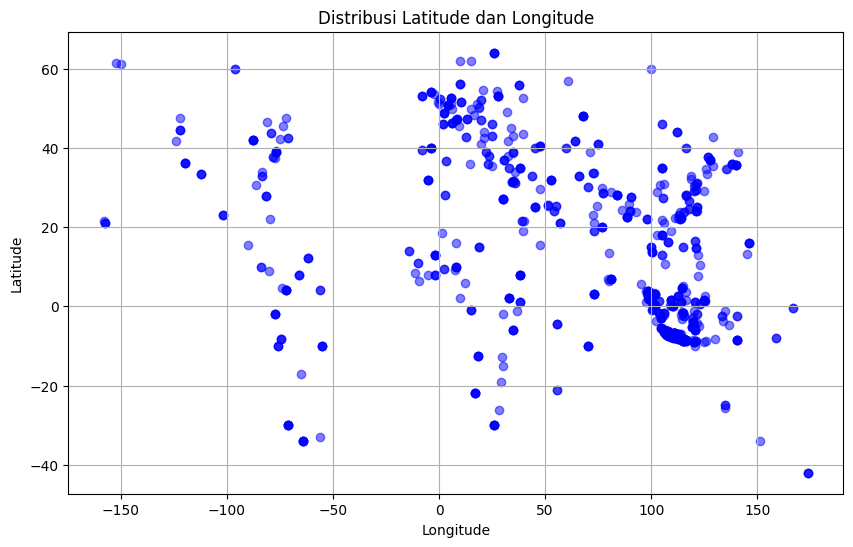

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot Latitude dan Longitude
plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, color='b')  # Membuat scatter plot
plt.title('Distribusi Latitude dan Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)  # Menambahkan grid agar lebih mudah dilihat
plt.show()


In [55]:
# Analisis distribusi Latitude dan Longitude
longitude_range = df['Longitude'].min(), df['Longitude'].max()
latitude_range = df['Latitude'].min(), df['Latitude'].max()

# Menyusun analisis berdasarkan range koordinat
print(f"Rentang Longitude: {longitude_range[0]} hingga {longitude_range[1]}")
print(f"Rentang Latitude: {latitude_range[0]} hingga {latitude_range[1]}")


Rentang Longitude: -158.113 hingga 174.0
Rentang Latitude: -42.0 hingga 64.0


In [56]:
# Menghitung konsentrasi data
data_density = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Density')
high_density_locations = data_density[data_density['Density'] > 1]  # Lokasi dengan lebih dari satu data

print(f"\nJumlah lokasi dengan konsentrasi data lebih dari satu: {len(high_density_locations)}")



Jumlah lokasi dengan konsentrasi data lebih dari satu: 233


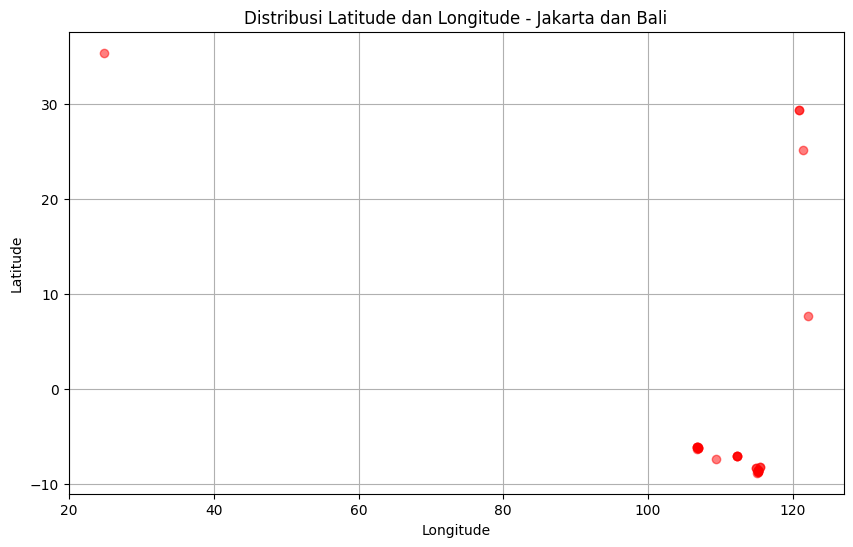

Jumlah data untuk Jakarta dan Bali: 34


In [57]:
# Filter lokasi Jakarta dan Bali
jakarta_bali_df = df[df['Location'].str.contains('Jakarta|Bali', case=False, na=False)]

# Plot Latitude dan Longitude untuk Jakarta dan Bali
plt.figure(figsize=(10, 6))  # Menentukan ukuran plot
plt.scatter(jakarta_bali_df['Longitude'], jakarta_bali_df['Latitude'], alpha=0.5, color='r')  # Membuat scatter plot dengan warna merah
plt.title('Distribusi Latitude dan Longitude - Jakarta dan Bali')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)  # Menambahkan grid agar lebih mudah dilihat
plt.show()

# Menampilkan jumlah data yang terfilter untuk Jakarta dan Bali
print(f"Jumlah data untuk Jakarta dan Bali: {jakarta_bali_df.shape[0]}")

In [58]:
# Filter lokasi Jakarta dan Bali
jakarta_bali_df = df[df['Location'].str.contains('Jakarta|Bali', case=False, na=False)]

# Menampilkan 5 baris pertama dari data terfilter
print("5 Baris Pertama Data Jakarta dan Bali:")
print(jakarta_bali_df.head())


5 Baris Pertama Data Jakarta dan Bali:
                            Location  LocationResultCount  Latitude  \
1   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
2   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
3   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
4   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
17       Bali, Jawa Timur, Indonesia                  168   -7.1046   

    Longitude                                                URL  \
1     106.829           https://www.chinaz.com/tags/915799.shtml   
2     106.829  https://www.cnnindonesia.com/olahraga/20241206...   
3     106.829  https://www.merdeka.com/sepakbola/bangga-momen...   
4     106.829  https://www.liputan6.com/tekno/read/5822357/to...   
17    112.337  https://hijau.bisnis.com/read/20241206/651/182...   

                                             ImageURL  \
1                                            No Image   
2   https:/

In [60]:
# Statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(jakarta_bali_df[['Latitude', 'Longitude', 'LocationResultCount']].describe())




Statistik Deskriptif:
        Latitude   Longitude  LocationResultCount
count  34.000000   34.000000            34.000000
mean   -2.662124  110.298097           131.088235
std    12.435312   15.835809           291.333649
min    -8.833300   24.783300             1.000000
25%    -8.509800  106.847750             2.000000
50%    -7.104600  114.937000             4.000000
75%    -6.174400  115.231000            37.000000
max    35.416700  122.148000           904.000000


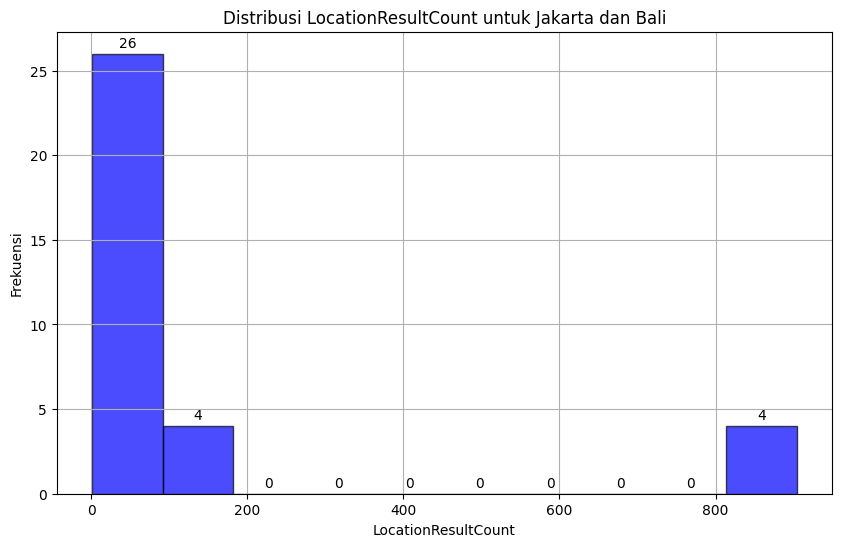

In [64]:
import matplotlib.pyplot as plt

# Membuat histogram untuk distribusi LocationResultCount
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(jakarta_bali_df['LocationResultCount'], bins=10, color='b', edgecolor='black', alpha=0.7)

# Menambahkan angka frekuensi di atas setiap batang histogram
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i] + 0.2, str(int(n[i])),
             ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi LocationResultCount untuk Jakarta dan Bali')
plt.xlabel('LocationResultCount')
plt.ylabel('Frekuensi')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


# Filter Events Code Sesuai Minat

In [65]:
# Memeriksa kolom-kolom yang ada dalam DataFrame
print(jakarta_bali_df.columns)


Index(['Location', 'LocationResultCount', 'Latitude', 'Longitude', 'URL',
       'ImageURL', 'Title'],
      dtype='object')


In [66]:
# Memeriksa beberapa baris pertama dari data yang telah difilter
print(jakarta_bali_df.head())


                            Location  LocationResultCount  Latitude  \
1   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
2   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
3   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
4   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
17       Bali, Jawa Timur, Indonesia                  168   -7.1046   

    Longitude                                                URL  \
1     106.829           https://www.chinaz.com/tags/915799.shtml   
2     106.829  https://www.cnnindonesia.com/olahraga/20241206...   
3     106.829  https://www.merdeka.com/sepakbola/bangga-momen...   
4     106.829  https://www.liputan6.com/tekno/read/5822357/to...   
17    112.337  https://hijau.bisnis.com/read/20241206/651/182...   

                                             ImageURL  \
1                                            No Image   
2   https://akcdn.detik.net.id/visual/2024/03/26/v

In [67]:
# Filter untuk data dengan lokasi yang mengandung 'Jakarta' dan 'Bali'
jakarta_bali_events = jakarta_bali_df[jakarta_bali_df['Location'].str.contains('Jakarta|Bali', case=False, na=False)]

# Menampilkan beberapa baris pertama setelah filter
print(jakarta_bali_events.head())

# Menampilkan jumlah data setelah filter
print(f"Jumlah data untuk Jakarta dan Bali: {jakarta_bali_events.shape[0]}")


                            Location  LocationResultCount  Latitude  \
1   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
2   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
3   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
4   Jakarta, Jakarta Raya, Indonesia                  904   -6.1744   
17       Bali, Jawa Timur, Indonesia                  168   -7.1046   

    Longitude                                                URL  \
1     106.829           https://www.chinaz.com/tags/915799.shtml   
2     106.829  https://www.cnnindonesia.com/olahraga/20241206...   
3     106.829  https://www.merdeka.com/sepakbola/bangga-momen...   
4     106.829  https://www.liputan6.com/tekno/read/5822357/to...   
17    112.337  https://hijau.bisnis.com/read/20241206/651/182...   

                                             ImageURL  \
1                                            No Image   
2   https://akcdn.detik.net.id/visual/2024/03/26/v

In [68]:
!pip install folium


In [69]:
import folium

# Membuat peta dengan titik tengah di Indonesia
map_center = [ -6.2, 106.8 ]  # Titik tengah antara Jakarta dan Bali
mymap = folium.Map(location=map_center, zoom_start=6)

# Menambahkan marker untuk setiap event di Jakarta dan Bali
for idx, row in jakarta_bali_events.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Title'],  # Menampilkan judul event saat marker diklik
        icon=folium.Icon(color='blue', icon='info-sign')  # Icon untuk marker
    ).add_to(mymap)

# Menyimpan peta ke dalam file HTML
mymap.save('peta_jakarta_bali.html')

# Menampilkan peta
mymap


In [70]:
from IPython.display import IFrame

# Menampilkan peta yang telah disimpan dalam file HTML
IFrame('peta_jakarta_bali.html', width=800, height=600)


# Analisis Deskriptif Data yang ada

In [71]:
# Ringkasan statistik dari data numerik
descriptive_stats = jakarta_bali_events[['Latitude', 'Longitude', 'LocationResultCount']].describe()
print(descriptive_stats)


        Latitude   Longitude  LocationResultCount
count  34.000000   34.000000            34.000000
mean   -2.662124  110.298097           131.088235
std    12.435312   15.835809           291.333649
min    -8.833300   24.783300             1.000000
25%    -8.509800  106.847750             2.000000
50%    -7.104600  114.937000             4.000000
75%    -6.174400  115.231000            37.000000
max    35.416700  122.148000           904.000000


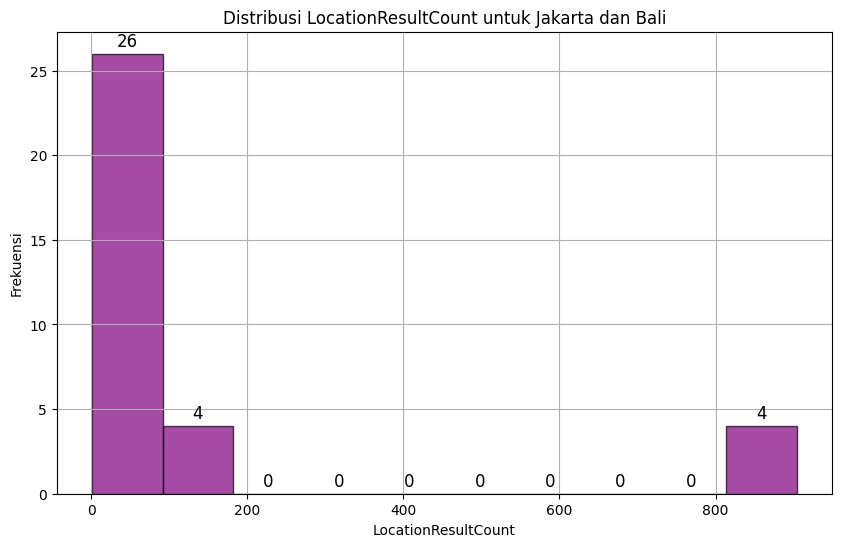

In [82]:
import matplotlib.pyplot as plt

# Visualisasi distribusi LocationResultCount
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(jakarta_bali_events['LocationResultCount'], bins=10, color='purple', edgecolor='black', alpha=0.7)

# Menambahkan jumlah di atas setiap bin
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, n[i] + 0.2,  # Posisi teks di atas bin
             str(int(n[i])),  # Nilai frekuensi, diubah ke integer
             ha='center',      # Horizontal alignment
             va='bottom',      # Vertical alignment
             fontsize=12)

# Judul dan label
plt.title('Distribusi LocationResultCount untuk Jakarta dan Bali')
plt.xlabel('LocationResultCount')
plt.ylabel('Frekuensi')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()


In [73]:
# Matriks korelasi untuk data numerik
correlation_matrix = jakarta_bali_events[['Latitude', 'Longitude', 'LocationResultCount']].corr()
print(correlation_matrix)


                     Latitude  Longitude  LocationResultCount
Latitude             1.000000  -0.378446            -0.134042
Longitude           -0.378446   1.000000            -0.068923
LocationResultCount -0.134042  -0.068923             1.000000


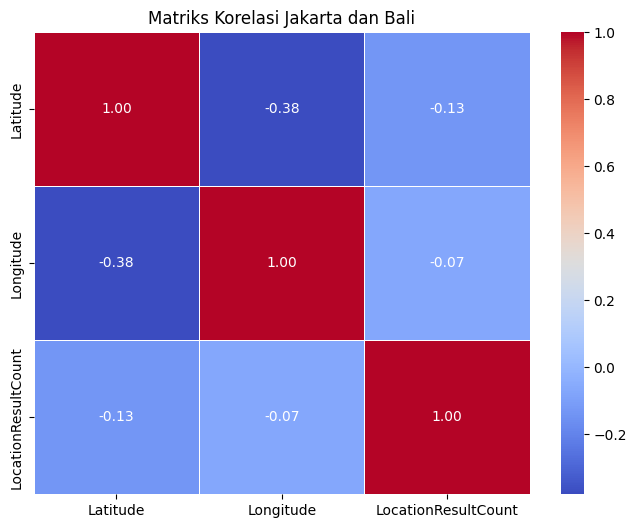

In [74]:
import seaborn as sns

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Jakarta dan Bali')
plt.show()


In [76]:
# Jumlah event berdasarkan Title
event_counts = jakarta_bali_events['Title'].value_counts()
print(event_counts.head(10))  # Menampilkan 10 event terpopuler


Title
Mary Jane Akan Dipulangkan Ke Filipina Sebelum Natal 2024                                                                                                                        2
Bali Rutin Dipakai WNA Buronan Masuk Indonesia , Ini Catatan NCB Interpol                                                                                                        2
Solidaritas untuk Ahmadiyah                                                                                                                                                      2
Rate Money Changer - Bali Hari ini . domino qiu qiu pro hdi . 76kbet top - apk go win slot                                                                                       2
印尼经济最新资讯 _ 印尼经济最新动态 _ 印尼                                                                                                                                                         1
Fresh pictures of Bali Nine members Matthew Norman and Si - Yi Chen inside jail stoke speculation t

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21360 (\N{CJK UNIFIED IDEOGRAPH-5370}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23612 (\N{CJK UNIFIED IDEOGRAPH-5C3C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32463 (\N{CJK UNIFIED IDEOGRAPH-7ECF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27982 (\N{CJK UNIFIED IDEOGRAPH-6D4E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

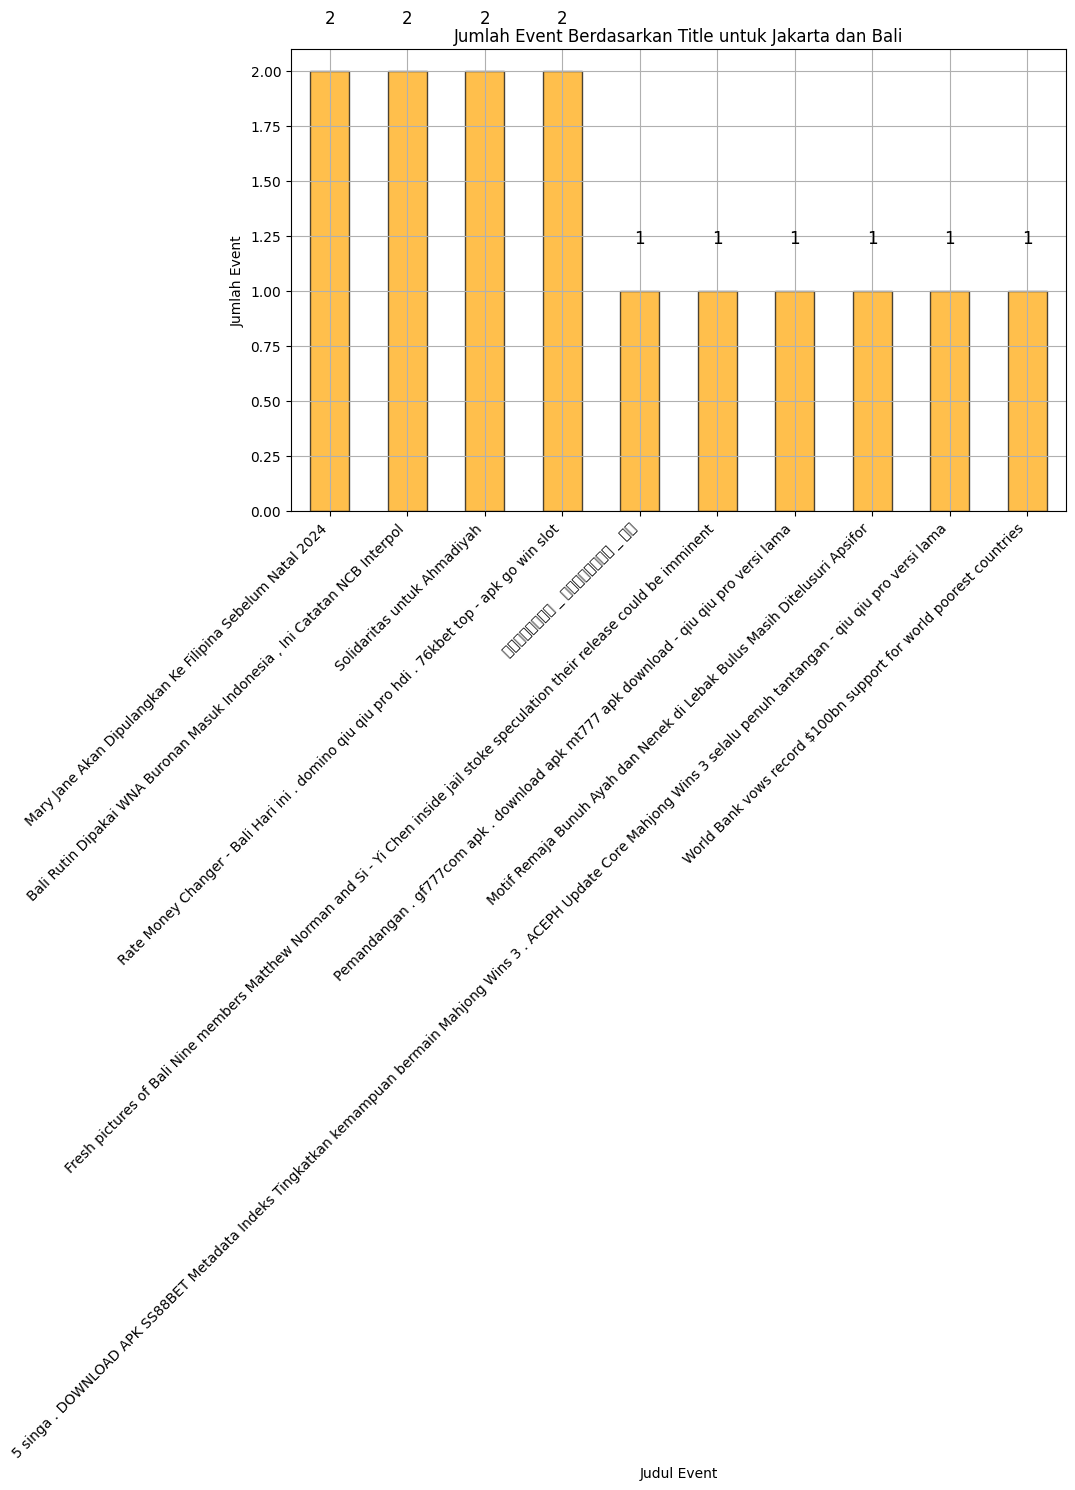

In [81]:
import matplotlib.pyplot as plt

# Visualisasi jumlah event berdasarkan Title
plt.figure(figsize=(10, 6))
ax = event_counts.head(10).plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)

# Menambahkan jumlah di atas setiap batang
for i in range(len(event_counts.head(10))):
    ax.text(i, event_counts.head(10).iloc[i] + 0.2,  # Posisi teks di atas batang
            str(event_counts.head(10).iloc[i]),         # Nilai jumlah
            ha='center',                               # Horizontal alignment
            va='bottom',                               # Vertical alignment
            fontsize=12)

# Judul dan label
plt.title('Jumlah Event Berdasarkan Title untuk Jakarta dan Bali')
plt.xlabel('Judul Event')
plt.ylabel('Jumlah Event')

# Menambahkan rotasi pada label x
plt.xticks(rotation=45, ha='right')

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()


In [78]:
# Menghitung jumlah event unik berdasarkan Title
unique_events = jakarta_bali_events['Title'].nunique()
print(f"Jumlah event unik: {unique_events}")


Jumlah event unik: 30


In [79]:
# Menampilkan jumlah Title per lokasi
title_per_location = jakarta_bali_events.groupby('Location')['Title'].value_counts()
print(title_per_location)


Location                                Title                                                                                                                                                                        
Bali, Hsin-Pei Shih, Taiwan             OPPO Find X8系列国内销量破百万 海外屡破纪录                                                                                                                                                     1
Bali, Jawa Timur, Indonesia             Bali Rutin Dipakai WNA Buronan Masuk Indonesia , Ini Catatan NCB Interpol                                                                                                        1
                                        Di Hadapan Jepang , Pemerintah Indonesia Sebut Berhasil Kurangi 128 Juta Ton Emisi Karbon pada 2023                                                                              1
                                        Mary Jane Akan Dipulangkan Ke Filipina Sebelum Natal 2024                                

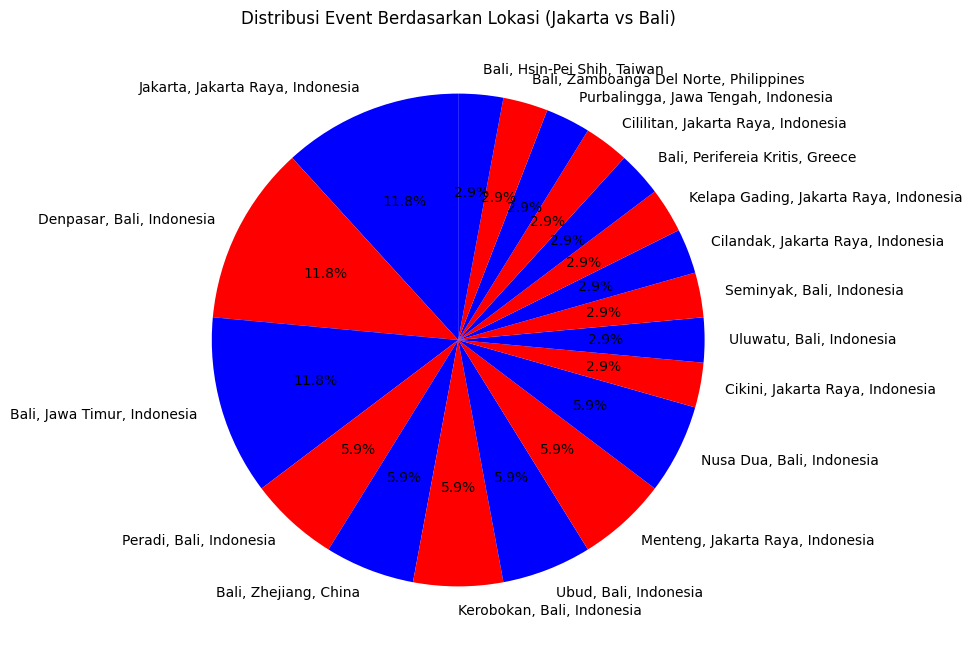

In [80]:
# Visualisasi pie chart berdasarkan Title di Jakarta dan Bali
location_counts = jakarta_bali_events['Location'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Distribusi Event Berdasarkan Lokasi (Jakarta vs Bali)')
plt.show()
